In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [8]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


There are 14 attributes in each case of the dataset. They are:
- `CRIM` - per capita crime rate by town
- `ZN` - proportion of residential land zoned for lots over 25,000 sq.ft.
- `INDUS` - proportion of non-retail business acres per town.
- `CHAS` - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- `NOX` - nitric oxides concentration (parts per 10 million)
- `RM` - average number of rooms per dwelling
- `AGE` - proportion of owner-occupied units built prior to 1940
- `DIS` - weighted distances to five Boston employment centres
- `RAD` - index of accessibility to radial highways
- `TAX` - full-value property-tax rate per \$10000
- `PTRATIO` - pupil-teacher ratio by town
- `B` - $1000(Bk - 0.63)^2$ where Bk is the proportion of blacks by town
- `LSTAT` - \% lower status of the population
- `MEDV` - Median value of owner-occupied homes in $1000's

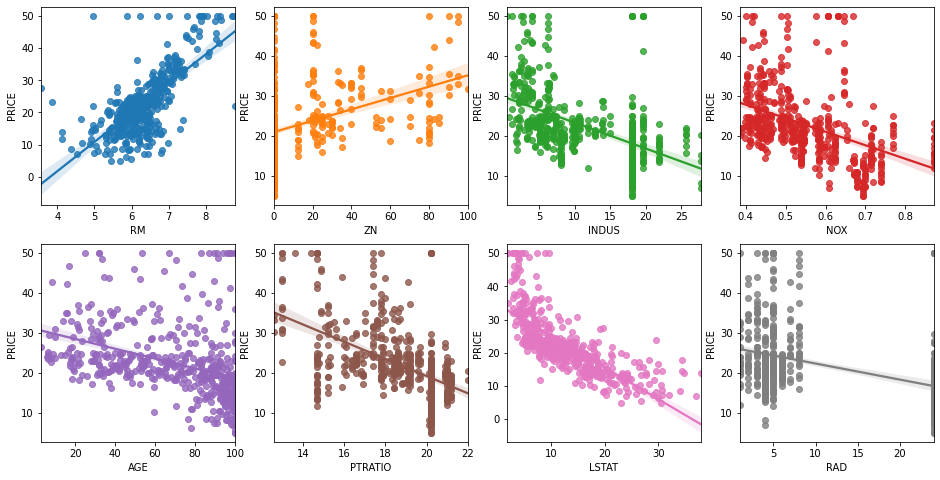

In [12]:
fig, axes = plt.subplots(figsize=(16,8), ncols=4, nrows=2)
lm_features = ['RM', 'ZN', 'INDUS', 'NOX', 'AGE', 'PTRATIO', 'LSTAT', 'RAD']
colors = plt.rcParams["axes.prop_cycle"]()

for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    c = next(colors)['color']
    sns.regplot(x=feature, y='PRICE', data=boston_df,
               ax=axes[row][col], color=c)

In [16]:
boston_df.shape

(506, 14)

In [27]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size=0.25, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(17.179746860481494, 4.144845818662197)

In [37]:
def find_best_test_size(size_start, size_end):
    
    def build_and_train_model(size):
        X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size=size, random_state=156)
        lr = LinearRegression()
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        return mse, rmse
            
    size = size_start
    dic = {}
    
    while (size < size_end):
        dic[size] = build_and_train_model(size)
        size += 0.005
        #print(size)

    return dic
        

In [38]:
find_best_test_size(0.15, 0.35)

{0.15: (19.01926555894076, 4.361108294796262),
 0.155: (20.128247506961884, 4.486451549605978),
 0.16: (20.364860929986502, 4.512744279259185),
 0.165: (19.967270584246023, 4.468475196780891),
 0.17: (19.377358964131453, 4.401972167578011),
 0.17500000000000002: (19.060821300839812, 4.365870050842078),
 0.18000000000000002: (18.971145719803665, 4.355587873043508),
 0.18500000000000003: (19.09963884019517, 4.3703133572085155),
 0.19000000000000003: (18.627073012367916, 4.315909291489792),
 0.19500000000000003: (18.429097601562106, 4.292912484731328),
 0.20000000000000004: (18.140266604383065, 4.2591391858429635),
 0.20500000000000004: (17.90242575295016, 4.231125825705276),
 0.21000000000000005: (17.741974412667584, 4.212122316916685),
 0.21500000000000005: (18.195918998102567, 4.265667473925102),
 0.22000000000000006: (17.82259125873159, 4.221681093916449),
 0.22500000000000006: (17.601740855053166, 4.195442867571094),
 0.23000000000000007: (17.825760854522894, 4.222056472209117),
 0.2

In [39]:
y_target = boston_df['PRICE']
X_data = boston_df.drop(['PRICE'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target,
                                                    test_size=0.285, random_state=156)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

mse, rmse

(16.076322269666232, 4.009528933636249)

In [45]:
pd.DataFrame(np.round(lr.coef_, 3), index=boston_df.columns[:-1])

,0
CRIM,-0.116
ZN,0.066
INDUS,0.045
CHAS,2.935
NOX,-20.630
RM,3.396
AGE,0.005
DIS,-1.726
RAD,0.352
TAX,-0.014


In [46]:
lr.intercept_

41.19936072802693